In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
articles = pd.read_csv('./data/articles.csv')
customers = pd.read_csv('./data/customers.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')
transactions_train = pd.read_csv('./data/transactions_train.csv')

## Articles

In [7]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [24]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc',
       'product_code_check'],
      dtype='object')

In [20]:
print(f"There are {len(articles)} articles of which {len(articles['article_id'].unique())} are unique.")

There are 105542 articles of which 105542 are unique.


In [149]:
articles.isna().sum() / len(articles)

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [12]:
articles["article_id"].describe()

count    1.055420e+05
mean     6.984246e+08
std      1.284624e+08
min      1.087750e+08
25%      6.169925e+08
50%      7.022130e+08
75%      7.967030e+08
max      9.594610e+08
Name: article_id, dtype: float64

In [15]:
article_min = articles["article_id"].min()
article_max = articles["article_id"].max()

print(f"Article ids from {article_min} to {article_max} with lengths {len(str(article_min))} to {len(str(article_max))}")

Article ids from 108775015 to 959461001 with lengths 9 to 9


In [16]:
articles["product_code"].describe()

count    105542.000000
mean     698424.563378
std      128462.384432
min      108775.000000
25%      616992.500000
50%      702213.000000
75%      796703.000000
max      959461.000000
Name: product_code, dtype: float64

In [22]:
# Check if the beginning of the article id matches the product code for each product
articles["product_code_check"] = articles['article_id'] // 1000 == articles['product_code']
articles["product_code_check"].describe()


count     105542
unique         1
top         True
freq      105542
Name: product_code_check, dtype: object

In [26]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
product_code_check       

In [32]:
products = articles[["product_code", "prod_name"]].drop_duplicates()
print(products[products.duplicated(subset="product_code", keep=False)])

        product_code                     prod_name
0             108775                     Strap top
2             108775                 Strap top (1)
46            146706      Tanktop body white 3PACK
48            146706               3P TANKTOP BODY
70            156610                  Connor pants
...              ...                           ...
105150        933729  HEDDA conscious training cap
105231        935196       PS STAR SILK MIX TIGHTS
105232        935196       PQ STAR SILK MIX TIGHTS
105335        937627            PS CAT CASH BEANIE
105336        937627            PQ CAT CASH BEANIE

[4764 rows x 2 columns]


In [35]:
product_types = articles[["product_type_no", "product_type_name"]].drop_duplicates()
print(product_types[product_types.duplicated(subset="product_type_no", keep=False)])

product_groups = articles[["product_type_no", "product_group_name"]].drop_duplicates()
print(product_groups[product_groups.duplicated(subset="product_type_no", keep=False)])

     product_type_no product_type_name
36               532          Umbrella
719               83          Umbrella
Empty DataFrame
Columns: [product_type_no, product_group_name]
Index: []


In [36]:
print(product_types[product_types.duplicated(subset="product_type_name", keep=False)])


     product_type_no product_type_name
36               532          Umbrella
719               83          Umbrella


In [46]:
def find_duplicate_pairwise_matches(numcol, namecol):
    df = articles[[numcol, namecol]].drop_duplicates()
    return df[df.duplicated(subset=namecol, keep=False)]    

In [47]:
duplicate_graphical_appearance = find_duplicate_pairwise_matches("graphical_appearance_no", "graphical_appearance_name")
duplicate_colour_group = find_duplicate_pairwise_matches("colour_group_code", "colour_group_name")
duplicate_perceived_colour_value = find_duplicate_pairwise_matches("perceived_colour_value_id", "perceived_colour_value_name")
duplicate_perceived_colour_master = find_duplicate_pairwise_matches("perceived_colour_master_id", "perceived_colour_master_name")
duplicate_department = find_duplicate_pairwise_matches("department_no", "department_name")
duplicate_index = find_duplicate_pairwise_matches("index_code", "index_name")
duplicate_index_group = find_duplicate_pairwise_matches("index_group_no", "index_group_name")
duplicate_section = find_duplicate_pairwise_matches("section_no", "section_name")
duplicate_garment_group = find_duplicate_pairwise_matches("garment_group_no", "garment_group_name") 

for duplicates in [duplicate_graphical_appearance, duplicate_colour_group, duplicate_perceived_colour_value, duplicate_perceived_colour_master, duplicate_department, duplicate_index, duplicate_index_group, duplicate_section, duplicate_garment_group]:
    print(f"{duplicates.columns[0]} has {len(duplicates)} duplicates")

graphical_appearance_no has 0 duplicates
colour_group_code has 0 duplicates
perceived_colour_value_id has 0 duplicates
perceived_colour_master_id has 0 duplicates
department_no has 71 duplicates
index_code has 0 duplicates
index_group_no has 0 duplicates
section_no has 2 duplicates
garment_group_no has 0 duplicates


In [56]:
duplicate_department = duplicate_department.sort_values(by="department_name")
print(duplicate_department)

       department_no department_name
5475            3510     Accessories
26948           3941     Accessories
9286            7530     Accessories
381             9985     Accessories
438             3209            Bags
...              ...             ...
4344            1710         Trouser
322             5656         Trouser
526             1722         Trouser
481             2031   Woven bottoms
859             1939   Woven bottoms

[71 rows x 2 columns]


In [59]:
print(duplicate_section)

       section_no  section_name
38956           4  Ladies Other
43598          17  Ladies Other


In [61]:
articles["product_type_name"].value_counts()


Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

In [62]:
articles["graphical_appearance_name"].value_counts()


Solid                  49747
All over pattern       17165
Melange                 5938
Stripe                  4990
Denim                   4842
Front print             3215
Placement print         3098
Check                   2178
Colour blocking         1830
Lace                    1513
Other structure         1502
Application/3D          1341
Embroidery              1165
Mixed solid/pattern     1132
Glittering/Metallic      958
Jacquard                 830
Sequin                   806
Dot                      681
Treatment                586
Other pattern            515
Contrast                 376
Metallic                 346
Chambray                 322
Slub                     153
Transparent               86
Mesh                      86
Neps                      66
Unknown                   52
Argyle                    15
Hologram                   8
Name: graphical_appearance_name, dtype: int64

In [63]:
articles["colour_group_name"].value_counts()


Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [65]:
articles["perceived_colour_value_name"].value_counts()

Dark            42706
Dusty Light     22152
Light           15739
Medium Dusty    12630
Bright           6471
Medium           5711
Undefined         105
Unknown            28
Name: perceived_colour_value_name, dtype: int64

In [69]:
articles["perceived_colour_master_name"].value_counts()

Black              22585
Blue               18469
White              12665
Pink                9403
Grey                8924
Red                 5878
Beige               5657
Green               3526
Khaki green         3181
Yellow              3121
Orange              2734
Brown               2269
Metal               2180
Turquoise           1829
Mole                1223
Lilac Purple        1100
Unknown              685
undefined            105
Yellowish Green        5
Bluish Green           3
Name: perceived_colour_master_name, dtype: int64

In [68]:
colour = articles[["colour_group_name", "perceived_colour_value_name", "perceived_colour_master_name"]]
colour.value_counts()

colour_group_name  perceived_colour_value_name  perceived_colour_master_name
Black              Dark                         Black                           22331
Dark Blue          Dark                         Blue                             9662
White              Light                        White                            9212
Light Pink         Dusty Light                  Pink                             4296
Grey               Dusty Light                  Grey                             3039
                                                                                ...  
Dark Blue          Dark                         Green                               1
Greenish Khaki     Medium Dusty                 Beige                               1
Dark Blue          Medium Dusty                 Grey                                1
Other Pink         Bright                       Red                                 1
Light Yellow       Medium Dusty                 Yellow         

In [71]:
articles["department_name"].value_counts()

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

In [70]:
articles["index_name"].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

In [72]:
articles["section_name"].value_counts()

Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Accessories      

In [73]:
articles["garment_group_name"].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [74]:
articles["detail_desc"].head()

0              Jersey top with narrow shoulder straps.
1              Jersey top with narrow shoulder straps.
2              Jersey top with narrow shoulder straps.
3    Microfibre T-shirt bra with underwired, moulde...
4    Microfibre T-shirt bra with underwired, moulde...
Name: detail_desc, dtype: object

In [75]:
articles["product_code_check"].value_counts()

True    105542
Name: product_code_check, dtype: int64

## Customers

In [81]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [80]:
print(f"There are {len(customers)} customers of which {len(customers['customer_id'].unique())} are unique.")

There are 1371980 customers of which 1371980 are unique.


In [150]:
customers.isna().sum() / len(customers)

customer_id               0.000000
FN                        0.652378
Active                    0.661508
club_member_status        0.004418
fashion_news_frequency    0.011669
age                       0.011561
postal_code               0.000000
age_intervals             0.011561
dtype: float64

In [83]:
customers["FN"].value_counts()

1.0    476930
Name: FN, dtype: int64

In [84]:
customers["Active"].value_counts()

1.0    464404
Name: Active, dtype: int64

In [85]:
customers["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [86]:
customers["fashion_news_frequency"].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [88]:
customers["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [90]:
customers["age"].value_counts()

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: age, Length: 84, dtype: int64

<AxesSubplot:>

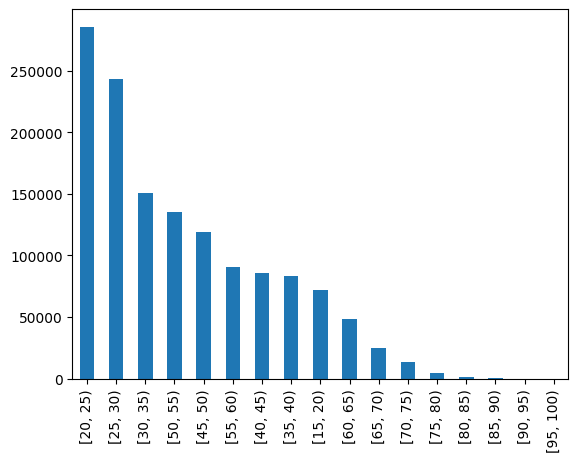

In [92]:
customers['age_intervals'] = pd.cut(customers['age'], range(15, 101, 5), right=False)
customers['age_intervals'].value_counts().plot.bar()


In [96]:
print(f"An example of a customer_id is {customers['customer_id'][0]} with length {len(str(customers['customer_id'][0]))}")

An example of a customer_id is 00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657 with length 64


In [98]:
user_id_matches = customers["customer_id"].str.fullmatch("^[0-9a-f]{64}$")
customers[~user_id_matches]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_intervals


In [99]:
print(f"An example of a postal code is {customers['postal_code'][0]} with length {len(str(customers['postal_code'][0]))}")

An example of a postal code is 52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100 with length 64


In [100]:
postal_code_matches = customers["postal_code"].str.fullmatch("^[0-9a-f]{64}$")
customers[~postal_code_matches]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_intervals


## Sample Submission

In [9]:
sample_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [103]:
(customers["customer_id"] == sample_submission["customer_id"]).value_counts()

True    1371980
Name: customer_id, dtype: int64

## Transactions 

In [10]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [129]:
transactions_train.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [120]:
(transactions_train["customer_id"].isin(customers["customer_id"])).value_counts()

True    31788324
Name: customer_id, dtype: int64

In [151]:
(customers["customer_id"].isin(transactions_train["customer_id"])).value_counts() / len(customers)

True     0.992931
False    0.007069
Name: customer_id, dtype: float64

In [123]:
(transactions_train["article_id"].isin(articles["article_id"])).value_counts()

True    31788324
Name: article_id, dtype: int64

In [152]:
(articles["article_id"].isin(transactions_train["article_id"])).value_counts() / len(articles)

True     0.990572
False    0.009428
Name: article_id, dtype: float64

In [128]:
transactions_train["t_dat"] = transactions_train["t_dat"].astype("datetime64")
transactions_train["t_dat"].describe()

C:\Users\5joshi\AppData\Local\Temp\ipykernel_19596\2945023692.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_train["t_dat"].describe()


count                31788324
unique                    734
top       2019-09-28 00:00:00
freq                   198622
first     2018-09-20 00:00:00
last      2020-09-22 00:00:00
Name: t_dat, dtype: object

In [130]:
transactions_train["price"].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

In [153]:
transactions_train["price"].agg(["min", "max"])

min    0.000017
max    0.591525
Name: price, dtype: float64

In [154]:
transactions_train["sales_channel_id"].value_counts() / len(transactions_train)

2    0.704028
1    0.295972
Name: sales_channel_id, dtype: float64

## Images

In [107]:
import os

In [111]:
image_names = []
for root, dirs, files in os.walk("./data/images"):
    for file in files:
        if file.endswith(".jpg"):
             image_names.append(int(file[:-4]))
            
image_names = pd.DataFrame(image_names, columns=["article_id"])
image_names.head()

,article_id
0,108775015
1,108775044
2,108775051
3,110065001
4,110065002


In [112]:
len(image_names)

105100

In [155]:
articles["has_image"] = articles["article_id"].isin(image_names["article_id"])
articles["has_image"].value_counts() / len(articles)

True     0.995812
False    0.004188
Name: has_image, dtype: float64

## Experiments

In [132]:
merged = pd.merge(articles, transactions_train, on="article_id", how="inner")
merged = pd.merge(merged, customers, on="customer_id", how="inner")
merged.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,customer_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_intervals
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.008458,1,1.0,1.0,ACTIVE,Regularly,37.0,e15819a7b5a739bde5002a217d27e049695afb433924ce...,"[35, 40)"
1,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.008458,1,1.0,1.0,ACTIVE,Regularly,37.0,e15819a7b5a739bde5002a217d27e049695afb433924ce...,"[35, 40)"
2,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.008458,1,1.0,1.0,ACTIVE,Regularly,37.0,e15819a7b5a739bde5002a217d27e049695afb433924ce...,"[35, 40)"
3,237347040,237347,Theron,308,Hoodie,Garment Upper body,1010010,Melange,71,Light Blue,...,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.033881,1,1.0,1.0,ACTIVE,Regularly,37.0,e15819a7b5a739bde5002a217d27e049695afb433924ce...,"[35, 40)"
4,270381001,270381,Clubba sunglasses,81,Sunglasses,Accessories,1010016,Solid,17,Yellowish Brown,...,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.006763,1,1.0,1.0,ACTIVE,Regularly,37.0,e15819a7b5a739bde5002a217d27e049695afb433924ce...,"[35, 40)"


Text(0, 0.5, 'Median age')

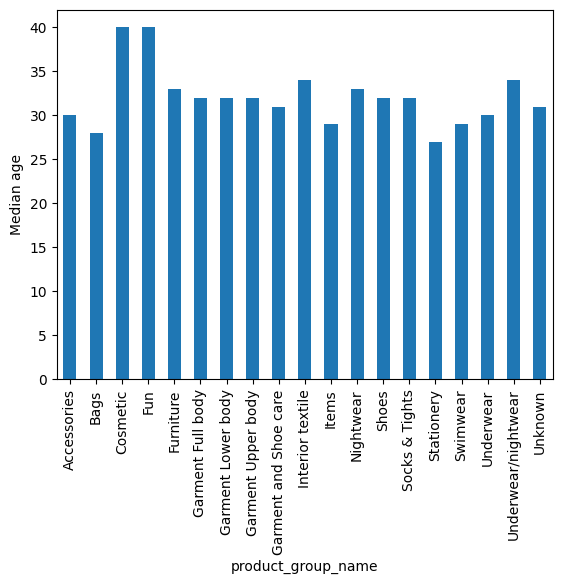

In [145]:
merged.groupby("product_group_name")['age'].median().plot.bar().set_ylabel("Median age")

Text(0, 0.5, 'Median age')

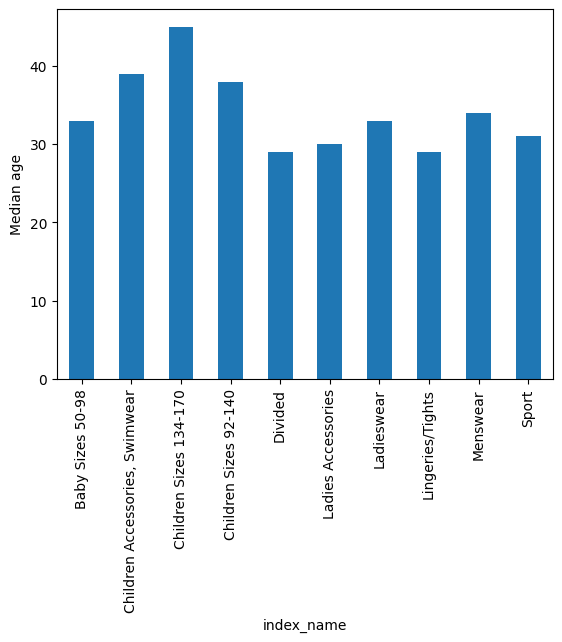

In [146]:
merged.groupby("index_name")['age'].median().plot.bar().set_ylabel("Median age")

Text(0, 0.5, 'Median age')

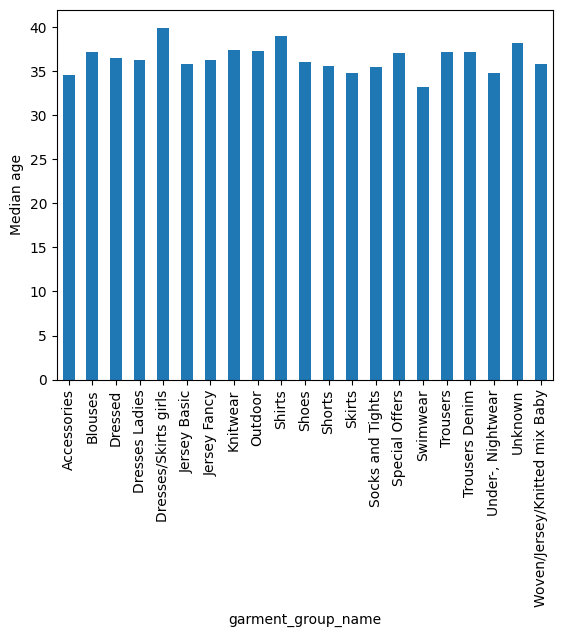

In [147]:
merged.groupby("garment_group_name")['age'].mean().plot.bar().set_ylabel("Median age")

Text(0, 0.5, 'Median age')

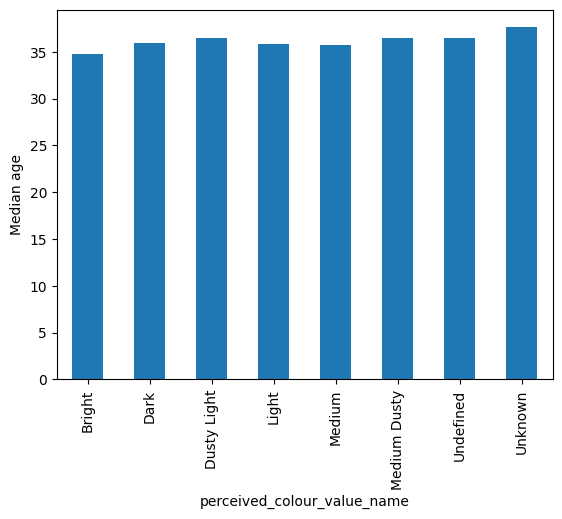

In [148]:
merged.groupby("perceived_colour_value_name")['age'].mean().plot.bar().set_ylabel("Median age")